# Importing All the Crucial Libraries 

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy
# pyplot used for visualiation
import matplotlib.pyplot as plt
# used for numeric calculations 
import numpy as np 
#used  for converting JPEG into a NumPy array
from skimage.io import imread 
 #used an image by a given scaling factor
from skimage.transform import resize
import os 
 # it is used for fast numerical computing
import tensorflow as tf
# it is used for  for developing and evaluating deep learning models
from tensorflow import keras 
 # used for plotting heatmap
import seaborn as sns
# used for image preprocessing
import pandas as pd 
#calculate score
from sklearn.metrics import precision_score,recall_score,f1_score,plot_precision_recall_curve,classification_report,confusion_matrix



# **Numpy**

It is python library which is used for array.Its perform a high multi-dimensional array .Its can be create with the multiple ways by defining the size of array .slicing is also used in the array for accessing the index.slice holds a range of elements with the help of modifying the orginal array .

# **Matplotlib**

It is a best visulaizing technique .AS comapared to others.It was introduce in 2002 by John Hunter.It comes with a various variety of plot.To make a corrrelation, to understand pattern to understand trends.The main benefit of matplot lib is it can used in the big amount of data .

# **Sequential**

This is used in the deep learning model for better accuracy .It is used to define.It provide a number of feature & procedures.It is stored in the format device.we can't make access the methods with the sequential type.

# **keras**

It is a open source library which is used in the neural network or in th edeep learning model.which can br run with the hrlp of tensorflow.its is unable to handle cns because it is unable to handle the low level calculation .it is an excellent libray it which is used for high level building books in the development.its support the multi platform .its is alos used because it is easy for develop the models

In [ ]:
# splitting in dependent and independent variables
target_images=[]
images=[]
flatten_images=[]

# Importing and preprocessing the data

###In our below code we are loading the data and categorised the fire and non fire images .after this we provide an iamge to our code and run it in the loop for getting the result .Whether it is fire or non fire.


In [ ]:
#imported the data
datadir=r'/content/drive/MyDrive/code/code/Forest Fire Dataset/Training' 
# defined two category
categories=["fire","nofire"] 
#make a loop 
for category in categories: 
   # for categories of the data (in our case fire and nofire)
  class_num=categories.index(category)
  # function to join datadirectory and categories together
  path=os.path.join(datadir,category) 

  for img in os.listdir(path):
     # imreading function used to read the pathd 
    img_array=imread(os.path.join(path,img))
    # for applying machine learning algo resizing 
    img_resized=resize(img_array,(150,150,3)) 
     # reshaping the  array
    img_resized = img_resized.reshape(22500,3)
     # append the resized image in flatten_images
    flatten_images.append(img_resized.flatten())
     # append the resized image in images
    images.append(img_resized)
    # append the resized image in target_images
    target_images.append(class_num) 

# Splitting 

###Here we are are splitting 80% of taining data && 20% of tsting data with the help of tain_tst_spilt function .

In [ ]:
#split data
from sklearn.model_selection import train_test_split 
# using testtrain split
x_train,x_test,y_train,y_test=train_test_split(flatten_images,target_images,test_size=0.2,random_state = 123) 

###In our below code we apply the machine learing model which is used for the  calculating the acuuracy.In our paritcular model we calculate acuuracy of the model,also we plot the confusion matrix of the particular model , also we print the classifiaction report of the model .This part is done for both the data training  as well as testing. The model we used in our below code are logistic regression , random forest , SVM ect, also with all this we plot the ROC curve for each model for the training part.

## Logistic Regression

### It is the most popular  machine learning algorithm  used for buliding the data under the supervised technique .It is used for solve the classification problem .It is easily determine and can be very easily to observe.

In [ ]:
#Fitting the model  
# importing algo.
from sklearn.linear_model import LogisticRegression  
# initializing algo by passing some of the parameters in it.
classifier= LogisticRegression(penalty='none',  
                         tol=0.1,solver = "lbfgs",
                         multi_class='multinomial').fit(x_train, y_train)  
# fiting algo with taining dataset. 
classifier.fit(x_train, y_train)
# score of tsting set
print("Accuracy by logistic_regresion of testing data is: ",classifier.score(x_test,y_test)) 

Accuracy by logistic_regresion of testing data is:  0.9243421052631579


In [ ]:
 # score of taining data
print("Accuracy by logistic regression of training data is: ",classifier.score(x_train,y_train))

Accuracy by logistic regression of training data is:  1.0


In [ ]:
# predict testing value
y_test_pred = classifier.predict(x_test)  

In [ ]:
#giving a name to an 1 and 0
y_test_pred = y_test_pred.reshape(1,-1)[0]
# print report
print(classification_report(y_test, y_test_pred, target_names = ['fire','nofire']))

              precision    recall  f1-score   support

        fire       0.90      0.95      0.92       146
      nofire       0.95      0.91      0.93       158

    accuracy                           0.92       304
   macro avg       0.92      0.93      0.92       304
weighted avg       0.93      0.92      0.92       304



confusion matrix of Logistic regression


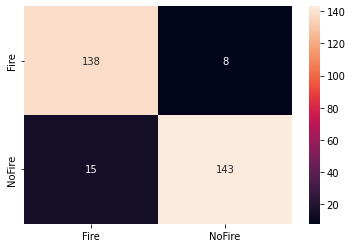

In [ ]:
 print("confusion matrix of Logistic regression") 
# calling the matrics
cm = confusion_matrix(y_test,y_test_pred) 
#giving  name to an subplot 
da_cm = pd.DataFrame(cm, index=(i for i in["Fire","NoFire"]),columns = (i for i in ["Fire","NoFire"])) 
# defining the column and rows of the matrix 
# annot is used to show the value in the matrix
sns.heatmap(da_cm, annot=True,fmt = "d");

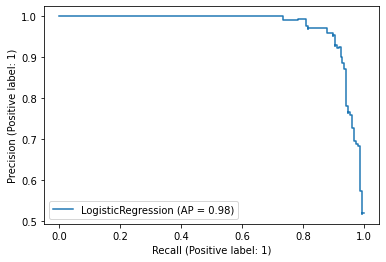

In [ ]:
#making a graph 
disp12 = plot_precision_recall_curve(classifier, x_test, y_test)
# graph of training data
import warnings
# importing warning
warnings.simplefilter(action='ignore', category=FutureWarning);
#ignore mistake

In [ ]:
train_pred1 = classifier.predict(x_train)
print("Accuracy by logistic regression of training data is: ",classifier.score(x_train,y_train))
#calculate score
print('Precision by logistic_regresion of taining data is: %.3f' % precision_score(y_train, train_pred1)) 
# calculate precision 
print('Recall by logistic_regresion of taining data is: %.3f' % recall_score(y_train, train_pred1)) 
# calculate recall 
print('F1 score by logistic_regresion of taining data is: %.3f' % f1_score(y_train, train_pred1)) 
# calculate f2 

Accuracy by logistic regression of training data is:  1.0
Precision by logistic_regresion of taining data is: 1.000
Recall by logistic_regresion of taining data is: 1.000
F1 score by logistic_regresion of taining data is: 1.000


confusion matrix of logR of training data


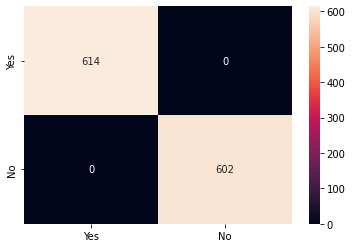

In [ ]:
print("confusion matrix of logR of training data")
#calling the matrix
cm = confusion_matrix(y_train,train_pred1)
#giving an name to an subpolt
db_cm = pd.DataFrame(cm, index=(i for i in["Yes","No"]),columns = (i for i in ["Yes","No"]))
#plot it in form of heatmap
sns.heatmap(db_cm, annot=True,fmt = "d");

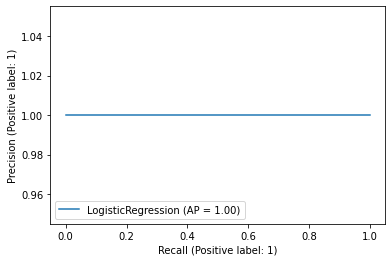

In [ ]:
#making a graph
disp12 = plot_precision_recall_curve(classifier, x_train, y_train)
# graph for training data
# importing warnings
import warnings
#ignoring mistake
warnings.simplefilter(action='ignore', category=FutureWarning)

# Random Forest Classifier

###It is machine learning algorithm used in the model to train it.

In [ ]:
#Fitting model  
# importing random_model
from sklearn.ensemble import RandomForestClassifier  
# calling model
classifier_rf= RandomForestClassifier(n_estimators= 13, criterion="entropy") 
# fitting model  
classifier_rf.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=13)

In [ ]:
# score of the model
print("Accuracy for Random_forest_Classifier using training data:",classifier_rf.score(x_train,y_train)) 

Accuracy for Random_forest_Classifier using training data: 0.9975328947368421


In [ ]:
# predicting the testing value
y_pred = classifier_rf.predict(x_test) 

In [ ]:
#predict the shape
y_pred = y_pred.reshape(1,-1)[0]
# printed clasification report for algo.
print(classification_report(y_test, y_pred, target_names = ['fire','nofire']))

              precision    recall  f1-score   support

        fire       0.88      0.88      0.88       146
      nofire       0.89      0.89      0.89       158

    accuracy                           0.88       304
   macro avg       0.88      0.88      0.88       304
weighted avg       0.88      0.88      0.88       304



confusion matrix of random forest classifier


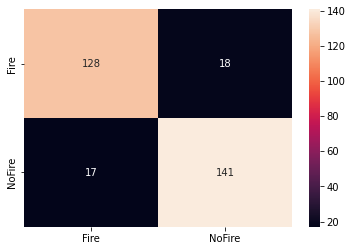

In [ ]:
# printed this statement
print("confusion matrix of random forest classifier")  
#calling the matrics
cm = confusion_matrix(y_test,y_pred) 
#making graph for the x axis
da_cm = pd.DataFrame(cm, index=(i for i in["Fire","NoFire"]),columns = (i for i in ["Fire","NoFire"]))
# library used for plotting the matrix
sns.heatmap(da_cm, annot=True,fmt = "d") ;

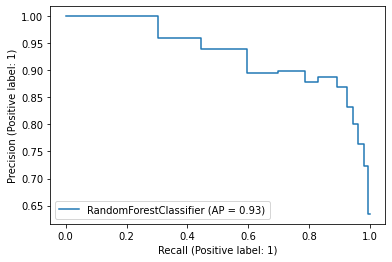

In [ ]:
#making a graph
disp12 = plot_precision_recall_curve(classifier_rf, x_test, y_test)
# importing warnings
import warnings
#ignoring mistakes
warnings.simplefilter(action='ignore', category=FutureWarning);

In [ ]:
# predicting tsting value
y_pred_train = classifier_rf.predict(x_train) 
# calculate accoracy for algo.
print("Accuracy by rfc of training data is: ",classifier.score(x_train,y_train))
# calculate score
print('Precision of rfc using taining data is: %.3f' % precision_score(y_train, y_pred_train)) 
# calculate the preciion 
print('Recall of rfc using taining data is: %.3f' % recall_score(y_train, y_pred_train)) 
# calculate the recal
print('F1 score of rfc using taining data is: %.3f' % f1_score(y_train, y_pred_train)) 
# calculate f1

Accuracy by rfc of training data is:  1.0
Precision of rfc using taining data is: 0.995
Recall of rfc using taining data is: 1.000
F1 score of rfc using taining data is: 0.998


confusion matrix of rfc of training data


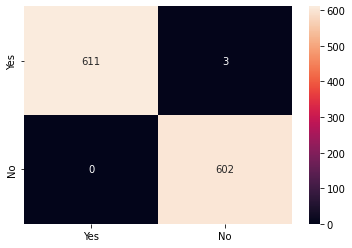

In [ ]:
# Making confugion matix for algo.
print("confusion matrix of rfc of training data")
# passing our data.
cm = confusion_matrix(y_train,y_pred_train)
# calling  the matix
db_cm = pd.DataFrame(cm, index=(i for i in["Yes","No"]),columns = (i for i in ["Yes","No"]))
#making a subplot for the x axis 
sns.heatmap(db_cm, annot=True,fmt = "d");
#make a graph in the heatmap

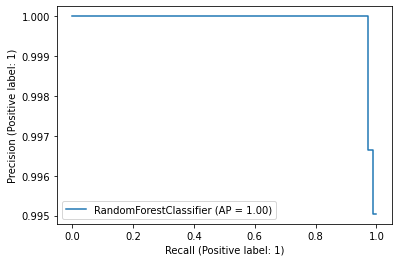

In [ ]:
#make a graph
disp12 = plot_precision_recall_curve(classifier_rf, x_train, y_train)
# graph of training data

import warnings
# importing warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#ignoring mistake

## KNeighbours Classifier

In [ ]:
# impoting the k_neighor algo.
from sklearn.neighbors import KNeighborsClassifier 
# define classifier for algo.
model1 = KNeighborsClassifier()
# fiting classifier with taining data.
model1.fit(x_train,y_train) 
print("Accuracy of KNeighbours_Classifier of testing data is:",model1.score(x_test,y_test)) 
# checking_score 

Accuracy of KNeighbours_Classifier of testing data is: 0.8717105263157895


In [ ]:
print("Accuracy of KNeighbours Classifier of taining data is:",model1.score(x_train,y_train)) 
# checking the score 

Accuracy of KNeighbours Classifier of taining data is: 0.9144736842105263


In [ ]:
test_pred2 = model1.predict(x_test) # predict the test value

In [ ]:
#giving the shape to an prediction value
test_pred2 = test_pred2.reshape(1,-1)[0]
#print the state ment
print(classification_report(y_test, test_pred2, target_names = ['fire','nofire']))

              precision    recall  f1-score   support

        fire       0.85      0.89      0.87       146
      nofire       0.89      0.85      0.87       158

    accuracy                           0.87       304
   macro avg       0.87      0.87      0.87       304
weighted avg       0.87      0.87      0.87       304



confusion matrix of KNeighborsClassifier


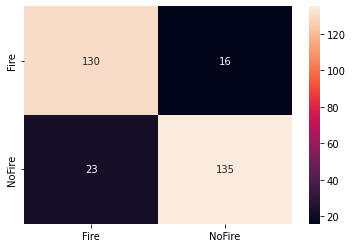

In [ ]:
# We are making heatmap for algo.
print("confusion matrix of KNeighborsClassifier") # printing this statement 
cm = confusion_matrix(y_test,test_pred2) # calling  matrix
#making a subplot for the x axis
da_cm = pd.DataFrame(cm, index=(i for i in["Fire","NoFire"]),columns = (i for i in ["Fire","NoFire"])) 
#making a graph with the help of heat map
sns.heatmap(da_cm, annot=True,fmt = "d");

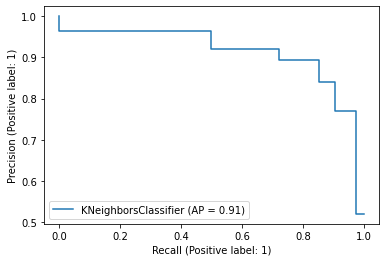

In [ ]:
#making a graph 
disp12 = plot_precision_recall_curve(model1, x_test, y_test)
# graph  of training data

import warnings
# importing warning
warnings.simplefilter(action='ignore', category=FutureWarning)
#ignoring mistake

In [ ]:
 # predicting the testing value
train_pred2 = model1.predict(x_train)

print("Accuracy of knn using taining data is: ",model1.score(x_train,y_train))
# calculate accoracy
print('Precision of knn using taining data is: %.3f' % precision_score(y_train, train_pred2)) 
# calculate precesion
print('Recall of knn using taining data is: %.3f' % recall_score(y_train, train_pred2)) 
# calculating recal 
print('F1 score of knn using taining data is: %.3f' % f1_score(y_train, train_pred2)) 
# calculating f2

Accuracy of knn using taining data is:  0.9144736842105263
Precision of knn using taining data is: 0.937
Recall of knn using taining data is: 0.887
F1 score of knn using taining data is: 0.911


confusion matrix of rfc of training data


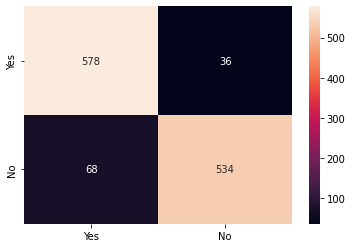

In [ ]:
# importing matix
print("confusion matrix of rfc of training data")
# pass our taining data.
cm = confusion_matrix(y_train,train_pred2)
# calling matix
db_cm = pd.DataFrame(cm, index=(i for i in["Yes","No"]),columns = (i for i in ["Yes","No"]))
# giving a name to an subplot
sns.heatmap(db_cm, annot=True,fmt = "d");
#making a graph with the help of heatmap

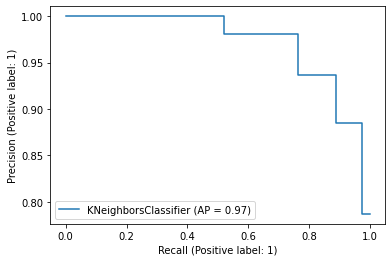

In [ ]:
#making a graph
disp12 = plot_precision_recall_curve(model1, x_train, y_train)
# graph  of training data

import warnings
# importing warning
warnings.simplefilter(action='ignore', category=FutureWarning)
#ignoring mistake

## Gausian Naive Bayes Algorithm

In [ ]:
# importing algo.
from sklearn.naive_bayes import GaussianNB 
# calling  algo
model3 = GaussianNB() 
#  fiting the algo
model3.fit(x_train,y_train) 
#printed the statement
print("Accuracy of Gaussian Naive Bayes of testing data is:",model3.score(x_test,y_test))

NameError: ignored

In [ ]:
print("Accuracy of Gaussian_Naive_Bayes of training data is:",model3.score(x_train,y_train))
# calculate score

In [ ]:
# predict the testing value
test_pred = model3.predict(x_test) 

In [ ]:
#make a  sublplot 
test_pred = test_pred.reshape(1,-1)[0]
#printed clasification report 
print(classification_report(y_test, test_pred, target_names = ['fire','nofire']))

In [ ]:
# importing  matix
from sklearn.metrics import confusion_matrix 
 # print this statement
print("confusion matrix of GaussianNaiveBayes classifier ")
# calling matrix
cm = confusion_matrix(y_test,test_pred) 
# making a class
da_cm = pd.DataFrame(cm, index=(i for i in["Fire","NoFire"]),columns = (i for i in ["Fire","NoFire"]))
# making a subplot to make a heatmap graph
sns.heatmap(da_cm, annot=True,fmt = "d") ;

In [ ]:
#make a graph 
disp12 = plot_precision_recall_curve(model3, x_test, y_test)

# graph  of training data

import warnings
# importing warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#ignoring future warnings

In [ ]:
# predicted model with taining data.
train_pred = model3.predict(x_train) 
print("Accuracy of gnb using taining data is: ",model3.score(x_train,y_train))
# calculate score
print('Precision of gnb using taining data is: %.3f' % precision_score(y_train, train_pred)) 
#calculate precision
print('Recall of gnb using taining data is: %.3f' % recall_score(y_train, train_pred)) 
# calculate recall
print('F1 score of gnb using taining data is: %.3f' % f1_score(y_train, train_pred)) 
# calculate f2 

In [ ]:
# impoting matix 
print("confusion matrix of gnb of training data")
# printed statement 
cm = confusion_matrix(y_train,train_pred)
# calling  matix
db_cm = pd.DataFrame(cm, index=(i for i in["Yes","No"]),columns = (i for i in ["Yes","No"]))
# making a subcolumn to an matrix
sns.heatmap(db_cm, annot=True,fmt = "d");


In [ ]:
#make a graph 
disp12 = plot_precision_recall_curve(model3, x_train, y_train)
#graph  of training data

import warnings
# importing warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#ignoring future warning

# SVC

In [ ]:
from sklearn import svm #importing model
model4 = svm.SVC(C = 100) # calling model
model4.fit(x_train,y_train) # fitting model
print("Accuracy by Support Vector Classifier of testing data is:",model1.score(x_test,y_test)) 
# checking accoracy

Accuracy by Support Vector Classifier of testing data is: 0.8717105263157895


In [ ]:
print("Accuracy by Support Vector Classifier of training data is:",model1.score(x_train,y_train)) 
# checking  accuracy 

Accuracy by Support Vector Classifier of training data is: 0.9144736842105263


In [ ]:
test_pred3 = model4.predict(x_test) # predicting the testing value  

In [ ]:
#making a prediction 
test_pred3 = test_pred3.reshape(1,-1)[0]
#print the repot
print(classification_report(y_test, test_pred3, target_names = ['fire','nofire']))

              precision    recall  f1-score   support

        fire       0.91      0.94      0.93       146
      nofire       0.94      0.92      0.93       158

    accuracy                           0.93       304
   macro avg       0.93      0.93      0.93       304
weighted avg       0.93      0.93      0.93       304



confusion matrix of SVC


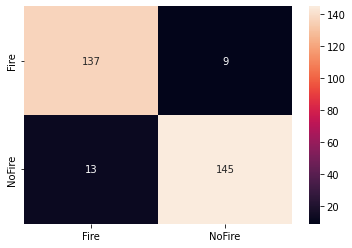

In [ ]:
# print this statement 
print("confusion matrix of SVC")
# calling  matix
cm = confusion_matrix(y_test,test_pred3) 
#name the subplot of the matrix
da_cm = pd.DataFrame(cm, index=(i for i in["Fire","NoFire"]),columns = (i for i in ["Fire","NoFire"]))
# library is used for plotting the matrix
sns.heatmap(da_cm, annot=True,fmt = "d") ;

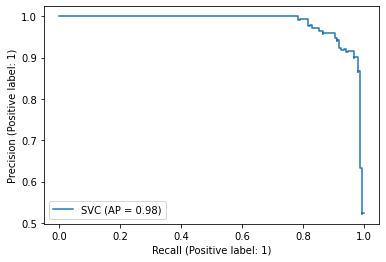

In [ ]:
#making a graph 
disp12 = plot_precision_recall_curve(model4, x_test, y_test)
# graph of training data

import warnings
# importing warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#ignoring future warnings

In [ ]:
# predicted model with taining value 
train_pred3 = model4.predict(x_train) 
print("Accuracy of svc using training data is: ",model4.score(x_train,y_train))
# calculate accuracy
print('Precision of svc using training data is: %.3f' % precision_score(y_train, train_pred3)) 
# calculate precision
print('Recall of svc using training data is: %.3f' % recall_score(y_train, train_pred3)) 
# calculate  recal 
print('F1 score of svc using training data is: %.3f' % f1_score(y_train, train_pred3)) 
# calculte f1 

Accuracy of svc using training data is:  1.0
Precision of svc using training data is: 1.000
Recall of svc using training data is: 1.000
F1 score of svc using training data is: 1.000


confusion matrix of svc of training data


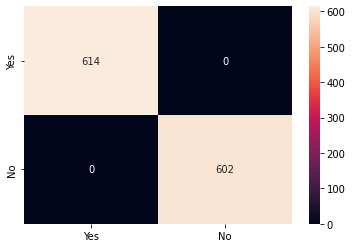

In [ ]:
print("confusion matrix of svc of training data")
# printed statement 
cm = confusion_matrix(y_train,train_pred3)
# calling  matix
db_cm = pd.DataFrame(cm, index=(i for i in["Yes","No"]),columns = (i for i in ["Yes","No"]))
# making a subplot to an matrix
sns.heatmap(db_cm, annot=True,fmt = "d");
# making a matrix with the help of the heatmap

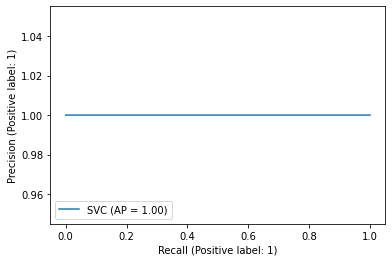

In [ ]:
#make a graph 
disp12 = plot_precision_recall_curve(model4, x_train, y_train)
# graph training data

import warnings
# importing warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#ignoring mistake

###In our above code we already applied the model also calculate it score , display its confusion matrix , plot an roc curve ,display an calssification report for both training and testing part of the model.

# Importing libraries for VGG19

In [ ]:
 # this library is used to solve computer vision problems
import cv2

# this is used for serializing and de-serializing Python object structures
import pickle 
# used for loading , rescaling, and displaying images
import matplotlib.image as mpimg 


# it is used for  for developing and evaluating deep learning models
import keras 
# it is used for fast numerical computing
import tensorflow  
#impoting plot model using keras.
from tensorflow.keras.utils import plot_model 
# we are importing model , sequential using keras.
from tensorflow.keras.models import Sequential ,Model
 #importing vgg19 algo.
from tensorflow.keras.applications import VGG19
# we are importing some of the important function for getting the results.
from tensorflow.keras.callbacks import EarlyStopping 
# importing data augmentation using karas.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# we are importing important function for getting the result.
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout,BatchNormalization,Activation

### we are importing the above library for the VGG19 model beacuse it consist of 19 layer including the input ,hidden output layer ,also we use the FLatten , dropout the layer activation the layer for the model 

# Defining data Paths

###Here we are  loading the dataset of train data, test data,val data from the loctaion .After loading dataset we make a loop in which we give our image data to store in the path .

In [ ]:
train_path = r"/content/drive/MyDrive/code/code/Forest Fire Dataset/Training" # importing training path
test_path = r"/content/drive/MyDrive/code/code/Forest Fire Dataset/Testing" # importing testing path
val_path = r"/content/drive/MyDrive/code/code/Forest Fire Dataset/Testing" # importing validation path

fire


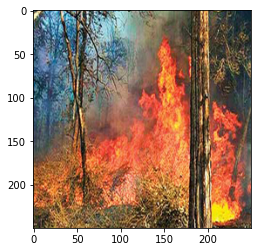

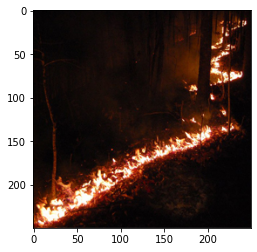

nofire


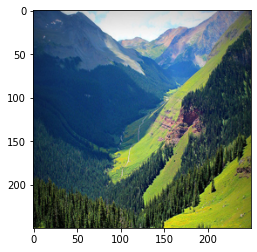

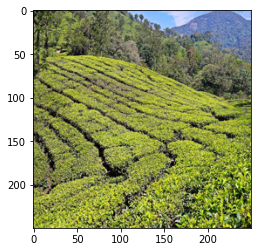

In [ ]:
#making aloop
for folder in os.listdir(train_path):

    sub_path = train_path + "/" + folder # accessing the images in the training folder 
    print(folder) # print the folder name
    for i in range(2): # print 2 images of each folder
        temp_path = os.listdir(sub_path)[i] # defining the temporary path
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path) # function to read the path of the image 
        implot = plt.imshow(img) 
        plt.show() #shows the image

# Converting image to pixels

In [ ]:
#function to convert image to pixels
def imagearray(path,size):
    data = []
    # list directory 
    for folder in os.listdir(path): 
      # declaring sub_path which includes the folders and the image paths
        sub_path = path+"/"+folder 
    
    #applying loop
        for img in os.listdir(sub_path):
           # defining image_path
            image_path = sub_path+"/"+img
            img_arr = cv2.imread(image_path) # function to read the image_path
            img_arr = cv2.resize(img_arr,size) # resizing th eimage array
            data.append(img_arr) # append the data with image array
    return data  # return the data value

In [ ]:
#declaring the size
size = (250,250)

In [ ]:
train = imagearray(train_path,size) # defining the train image array
test = imagearray(test_path,size) # defining the test image array
val = imagearray(val_path,size) # defining the validation image array
                 

# Normalization

In [ ]:
#converting images into numpy arays
x_train = np.array(train) # converting training data into numpy array
x_test = np.array(test) # converting testing data into numpy array
x_val = np.array(val) # converting validation data into numpy array

In [ ]:
x_train = x_train/255 # setting the numpy array size in 255 for training data
x_test = x_test/255 # setting the numpy array size in 255 for testing data
x_val = x_val/255 # setting the numpy array size in 255 for validation data

# Defining Target Variables

In [ ]:
#function to define target variables
def data_class(data_path,size,class_mode):
    datagen = ImageDataGenerator(rescale = 1./255) # rescaling the image in 255 array size
    classes = datagen.flow_from_directory(data_path,   
                                         target_size = size,
                                         batch_size = 32,
                                         class_mode = class_mode) # defining the target variables with some parameters
    return classes # return the class value

In [ ]:
train_class = data_class(train_path,size,"sparse") # defining the train class 
test_class = data_class(test_path,size,"sparse") # defining the test class
val_class = data_class(val_path,size,"sparse") # defining the validation class

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [ ]:
y_train = train_class.classes # defining the dependent training class
y_test = test_class.classes # defining the dependent testing class
y_val = val_class.classes # defining the dependent validation class

In [ ]:
train_class.classes # checking the 0 and 1 number of values in training data

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
train_class.class_indices # checking the 2 categories of classification in training data

{'fire': 0, 'nofire': 1}

In [ ]:
print("y_train_shape",y_train.shape,"y_test_shape",y_test.shape)
# printed sape of the taining &&& the tsting dependent data

y_train_shape (1520,) y_test_shape (380,)


# VGG19 Model

###It is an another form of VGG model .It consist of 19 layer while applying the model,inclding the hidden layer ,input layer , ouput layer.This model is bases on deep neural model or deep learning model . It is a model in starting it is used on the trained dataset in which that represent the dataset.This model is trained on a big data set such as images .

In [ ]:
#initializing the model
vgg = VGG19(input_shape = (250,250,3),weights = "imagenet", include_top = False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False # making the trainable layer in vgg 19 as false.

In [ ]:
x = Flatten()(vgg.output)  # Flatten the image array of the independent images
prediction = Dense(3,activation = "softmax")(x) # using the activation function as softmax 

In [ ]:
#summary of the algo
model = Model(inputs = vgg.input, outputs = prediction) # summary of the model with predicted values
model.summary() # function to show the summary

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [ ]:
#initializing the earlystop
early_stop = EarlyStopping(mode = "min",verbose = 1, patience = 5) # defining the early stop

In [ ]:
# we are compiling algo. with some parameter.
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) 

In [ ]:
#fit model
history = model.fit(x_train,y_train,
         epochs = 10,
          validation_data = (x_val,y_val)
          ,callbacks = [early_stop],
         batch_size = 30,
         shuffle = True,steps_per_epoch = 5)

Epoch 1/10
5/5 [==============================] - 380s 88s/step - loss: 0.7580 - accuracy: 0.5400 - val_loss: 0.3738 - val_accuracy: 0.8921
Epoch 2/10
5/5 [==============================] - 375s 89s/step - loss: 0.3460 - accuracy: 0.8400 - val_loss: 0.2285 - val_accuracy: 0.9316
Epoch 3/10
5/5 [==============================] - 380s 90s/step - loss: 0.3007 - accuracy: 0.8800 - val_loss: 0.1799 - val_accuracy: 0.9500
Epoch 4/10
5/5 [==============================] - 372s 88s/step - loss: 0.2009 - accuracy: 0.9267 - val_loss: 0.1521 - val_accuracy: 0.9500
Epoch 5/10
5/5 [==============================] - 375s 88s/step - loss: 0.1213 - accuracy: 0.9600 - val_loss: 0.1281 - val_accuracy: 0.9658
Epoch 6/10
5/5 [==============================] - 375s 88s/step - loss: 0.1420 - accuracy: 0.9333 - val_loss: 0.1151 - val_accuracy: 0.9684
Epoch 7/10
5/5 [==============================] - 376s 89s/step - loss: 0.1534 - accuracy: 0.9533 - val_loss: 0.1256 - val_accuracy: 0.9526
Epoch 8/10
5/5 [====

In [ ]:
#  showing taining accoracy && loss 
model.evaluate(x_train, y_train,batch_size = 32) 


48/48 [==============================] - 1073s 22s/step - loss: 0.0788 - accuracy: 0.9789


[0.07884766161441803, 0.9789473414421082]

In [ ]:
#  showing val accoracy && loss 
model.evaluate(x_val, y_val,batch_size = 32)

12/12 [==============================] - 269s 22s/step - loss: 0.0995 - accuracy: 0.9658


[0.09949049353599548, 0.9657894968986511]

In [ ]:
#  showing tsting accoracy && loss 
model.evaluate(x_test, y_test,batch_size = 32)

12/12 [==============================] - 276s 23s/step - loss: 0.0995 - accuracy: 0.9658


[0.09949049353599548, 0.9657894968986511]

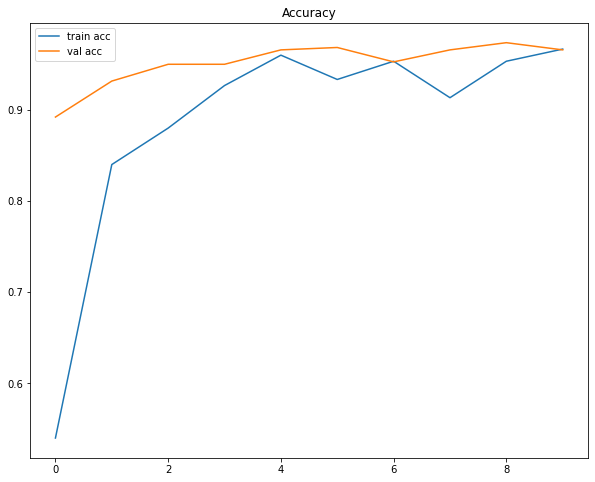

In [ ]:
#giving a size 
plt.figure(figsize = (10,8))
# plot a triain accoracy
plt.plot(history.history['accuracy'],label = 'train acc')
#plot a validation accuracy
plt.plot(history.history['val_accuracy'],label = 'val acc')
#it label the position of the graph
plt.legend()
#giving name
plt.title('Accuracy');

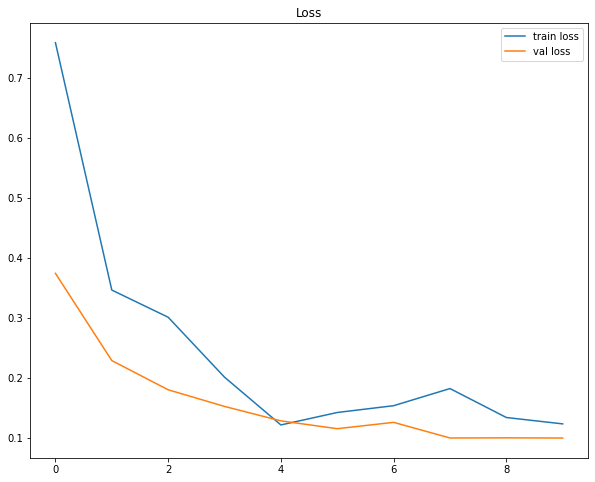

In [ ]:
# giving a size
plt.figure(figsize = (10,8))
#seting parameter for taining losses.
plt.plot(history.history['loss'],label = 'train loss')
# set parameter for tsting losses.
plt.plot(history.history['val_loss'],label = 'val loss')
# set legends for graph. 
plt.legend()
# set titled for graph.
plt.title('Loss');


In [ ]:
#Making prediction
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

12/12 [==============================] - 270s 22s/step


In [ ]:
print(classification_report(y_pred,y_test))

import warnings
warnings.simplefilter("ignore", UserWarning)


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       185
           1       0.98      0.95      0.97       195

    accuracy                           0.97       380
   macro avg       0.97      0.97      0.97       380
weighted avg       0.97      0.97      0.97       380



[Text(0, 0.5, 'fire'), Text(0, 1.5, 'nofire')]

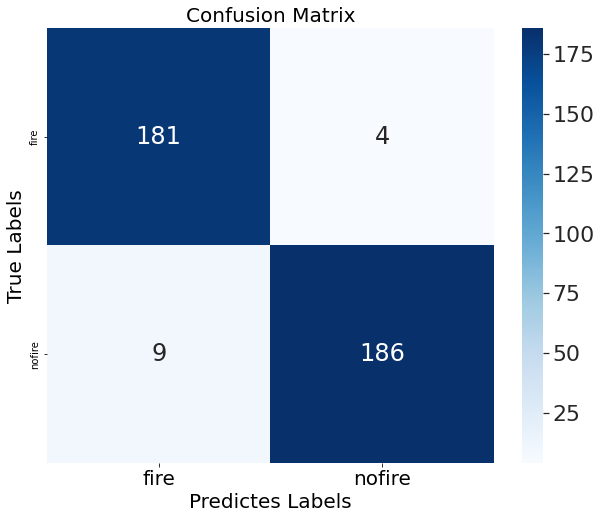

In [ ]:
# making confugion matix.
cm = confusion_matrix(y_pred,y_test)
# define figure size for matix.
plt.figure(figsize = (10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
# passing parameter for matix.
sns.heatmap(cm,annot = True,fmt = 'g',cmap = "Blues", ax = ax);

# Labels, titled and ticks
#name a x axis
ax.set_xlabel("Predictes Labels", fontsize = 20); 
#giving a name to y axis
ax.set_ylabel('True Labels', fontsize = 20);
#giving name 
ax.set_title("Confusion Matrix", fontsize = 20);
#giving a name to subplot
ax.xaxis.set_ticklabels(["fire","nofire"], fontsize = 20); 
#giving a name to subplot
ax.yaxis.set_ticklabels(["fire","nofire"])

In [ ]:
def plot_roc(model, x_test, y_test):
    # we are calculate fpr && tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(x_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('rahul')# set title for graph.
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    # set y label for graph.
    plt.ylabel('True Positive Rate')
    # set x label for graph.
    plt.xlabel('False Positive Rate');

In [ ]:
# printed f score for algo.
print("F1 score is: ",f1_score(y_test,y_pred,average = "micro"))
# printed recal for algo.
print("Recall value is: ",recall_score(y_test,y_pred,average = "weighted"))

import warnings
warnings.simplefilter("ignore", UserWarning)
# printed precesion for algo.
print("Precision Score is: ",precision_score(y_test,y_pred,average = "micro"))

F1 score is:  0.9657894736842105
Recall value is:  0.9657894736842105
Precision Score is:  0.9657894736842105


In [ ]:
#Making training prediction
y_pred_train=model.predict(x_train)
y_pred_train=np.argmax(y_pred_train,axis=1)

48/48 [==============================] - 1074s 22s/step


In [ ]:
print(classification_report(y_pred_train,y_train))

import warnings
warnings.simplefilter("ignore", UserWarning)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       744
           1       0.99      0.97      0.98       776

    accuracy                           0.98      1520
   macro avg       0.98      0.98      0.98      1520
weighted avg       0.98      0.98      0.98      1520



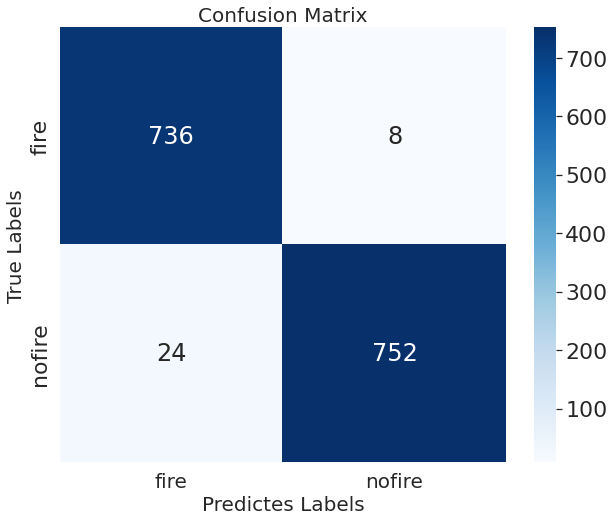

In [ ]:
# making confugion matix.
cm = confusion_matrix(y_pred_train,y_train)
# define figure size for matix.
plt.figure(figsize = (10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt = 'g',cmap = "Blues", ax = ax);

# Labels, titled and ticks
#name a x axis
ax.set_xlabel("Predictes Labels", fontsize = 20); 
#giving a name to y axis
ax.set_ylabel('True Labels', fontsize = 20);
#giving name 
ax.set_title("Confusion Matrix", fontsize = 20);
#giving a name to subplot
ax.xaxis.set_ticklabels(["fire","nofire"], fontsize = 20); 
#giving a name to subplot
ax.yaxis.set_ticklabels(["fire","nofire"]);

In [ ]:
# printed f score for algo.
print("F1 score is: ",f1_score(y_train,y_pred_train,average = "micro"))
# printed recal for algo.
print("Recall value is: ",recall_score(y_train,y_pred_train,average = "weighted"))

import warnings
warnings.simplefilter("ignore", UserWarning)
# printed precesion for algo.
print("Precision Score is: ",precision_score(y_train,y_pred_train,average = "micro"))

F1 score is:  0.9789473684210527
Recall value is:  0.9789473684210527
Precision Score is:  0.9789473684210527


In this above code we had import the all essential library then after importing the library load our dataset , after loading the dataset we make a loop that read all the data which is in the image form, after that we separate the dependent and indepndent variable after this split the data ,after splitting the data we apply our model, then we will plot the loss accuracy graph, accuracy graph for the training part ,then calculate the precision score ,f1 score ,recall score etc. after this we plot aconfusion matrix for the test data as well as the train data set , we also plot the classification report of the train data as well as test data.
